In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Exercise 2

In [10]:
def getDistances(A):
    if type(A) == pd.DataFrame:
        A = A.to_numpy()
    n = A.shape[0]
    w = np.zeros((n, n))
    for i in range (n):
        for j in range (n):
            row1 = A[i, :]
            row2 = A[j, :]
            dist = np.linalg.norm(row1-row2)
            w[i,j] = dist
    return(w)

In [14]:
def plotClusters(A, C, dimX, dimY, dimZ = None, ax = None):
    if type(A) == pd.DataFrame:
        A = A.to_numpy()
    if dimZ == None:
        if ax == None:
            fig = plt.figure()
            ax = fig.add_subplot(111)
        for key in np.unique(C):
            test = A[C == key]
            ax.plot(test[:, dimX], test[:, dimY], 'o')
        ax.legend(np.unique(C))
            
    else:
        if ax == None:
            fig = plt.figure()
            ax = fig.add_subplot(111, projection = '3d')
        for key in np.unique(C):
            test = A[C == key]
            ax.plot(test[:, dimX], test[:, dimY], test[:, dimZ], 'o')
        ax.legend(np.unique(C))  
        
    return(ax)    

In [15]:
import pandas as pd_test
dfIrisTest = pd_test.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")
A_Iris_Test = dfIrisTest[dfIrisTest.columns[:4]].astype(float)
C_Iris_Test = dfIrisTest[dfIrisTest.columns[4]]
D_Iris_Test = getDistances(A_Iris_Test)

## unit test for distance matrix
exp = {
    (0, 4): 0.1414213562373093,
    (3, 4): 0.6480740698407862,
    (99, 32): 3.184336665618131
}
for e in exp:
    a = D_Iris_Test[e] if D_Iris_Test[e] != 0 else D_Iris_Test[e[1],e[0]]
    print ("Entry " + str(e) + ": " + ("OK" if np.isclose(a, exp[e]) else "FAILED"))

Entry (0, 4): OK
Entry (3, 4): OK
Entry (99, 32): OK



Test Plots
------------------
2D:


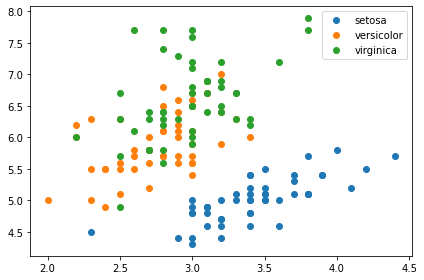

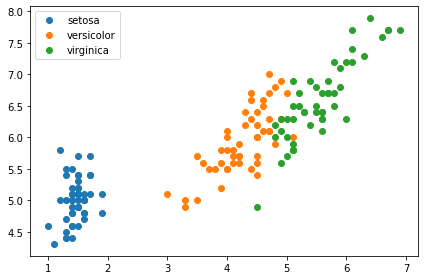

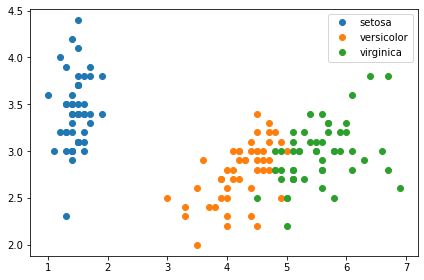

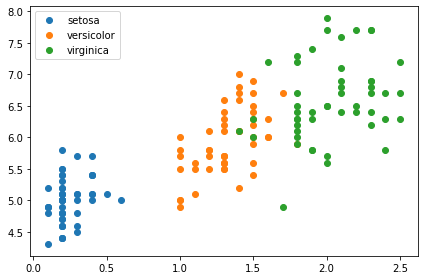

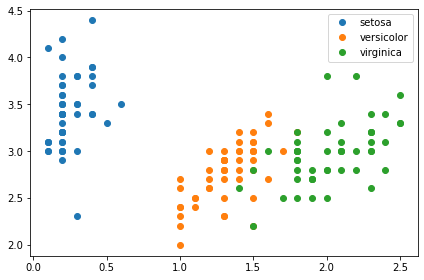

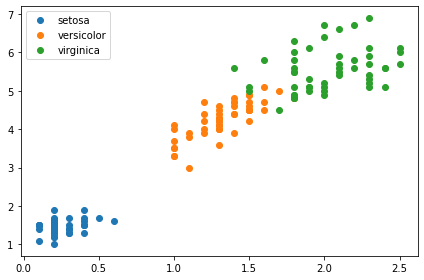

3D:


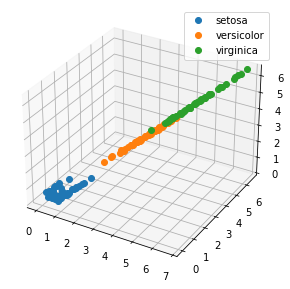

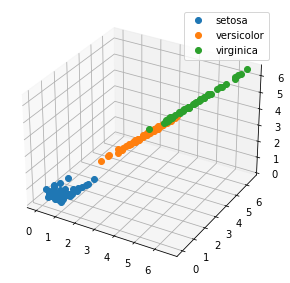

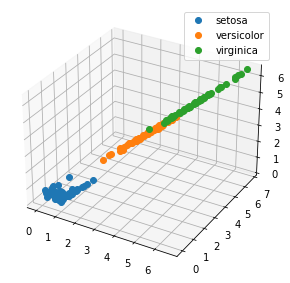

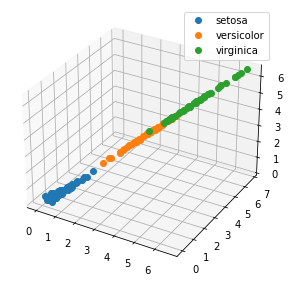

In [16]:
import pandas as pd_test
dfIrisTest = pd_test.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")
A_Iris_Test = dfIrisTest[dfIrisTest.columns[:4]].astype(float)
C_Iris_Test = dfIrisTest[dfIrisTest.columns[4]]
D_Iris_Test = getDistances(A_Iris_Test)

print ("\nTest Plots\n------------------")
print("2D:")
for x in range(4):
    for y in range(x):
        plotClusters(A_Iris_Test, C_Iris_Test, x, y)
        plt.tight_layout()
        plt.show()

print("3D:")
for x in range(4):
    for y in range(x):
        for z in range(y):
            plotClusters(D_Iris_Test, C_Iris_Test, x, y, z)
            plt.tight_layout()
            plt.show()

# Exercise 3

In [ ]:
# Test weights
import pandas as pd_test
import numpy as np_test
dfIrisTest = pd_test.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")
A_Iris_Test = dfIrisTest[dfIrisTest.columns[:4]].astype(float)
C_Iris_Test = dfIrisTest[dfIrisTest.columns[4]]
D_Iris_Test = getDistances(A_Iris_Test)
C1 = np.where(C_Iris_Test == 'setosa')[0]
C2 = np.where(C_Iris_Test == 'versicolor')[0]
C3 = np.where(C_Iris_Test == 'virginica')[0]
CList = [C1, C2, C3]

print ("\nTest Weight Measures\n------------------")
expectedW = {
    (0,1): 8246,
    (0,2): 12056,
    (1,2): 4606
}
wSummary = "W: "
wFailed = False
for i in range(3):
    for j in range(i):
        p1 = (i,j)
        p2 = (j,i)
        W1 = np_test.round(getW(D_Iris_Test, CList[i], CList[j]))
        W2 = np_test.round(getW(D_Iris_Test, CList[j], CList[i]))
        if W1 != W2:
            if not wFailed:
                wSummary += "failed"
            wSummary += "\n\tasymmetry of W: " + str(W1) + " != " + str(W2)
            wFailed = True
        
        if W1 != expectedW[p2]:
            if not wFailed:
                wSummary += "failed"
            wSummary += "\n\tunexpected value of W: " + str(W1) + " instead of expected " + str(expectedW[p2])
            wFailed = True
if not wFailed:
    wSummary += "ok"
print(wSummary)
expectedWIn = 3518
expectedWOut = 24908
expectedNIn = 3675
expectedNOut = 7500
print("WIn:", "ok" if np_test.abs(np_test.round(getWIn(D_Iris_Test, C_Iris_Test)) - expectedWIn) < 2 else "failed")
print("WOut:", "ok" if np_test.abs(np_test.round(getWOut(D_Iris_Test, C_Iris_Test)) - expectedWOut) < 2 else "failed")
print("NIn:", "ok" if getNIn(C_Iris_Test) == 3675 else "failed")
print("NOut:", "ok" if getNOut(C_Iris_Test) == 7500 else "failed")

In [ ]:
# Test weights
import pandas as pd_test
import numpy as np_test
dfIrisTest = pd_test.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")
A_Iris_Test = dfIrisTest[dfIrisTest.columns[:4]].astype(float)
C_Iris_Test = dfIrisTest[dfIrisTest.columns[4]]
D_Iris_Test = getDistances(A_Iris_Test)

# Test metrics
print ("\nTest Metrics\n------------------")
expected = {
    "beta": 0.2882861014913346,
    "cindex": 0.046803774122703735,
    "nc": 2.6150343040385264,
    "mod": -0.2167005841377044,
    "dunn": 0.05848053214719304,
    "db": 0.8445815484442534,
    "sil": 0.5032506980665507
}
for m in expected:
    e = np.round(expected[m], 2)
    a = getMetric(A_Iris_Test, C_Iris_Test, m)
    a = np.round(a, 2) if not a is None else None
    print(m + ":\t", "ok" if e == a else "failed. Expected " + str(e) + " but saw " + str(a))